In [63]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

### Read the dataset

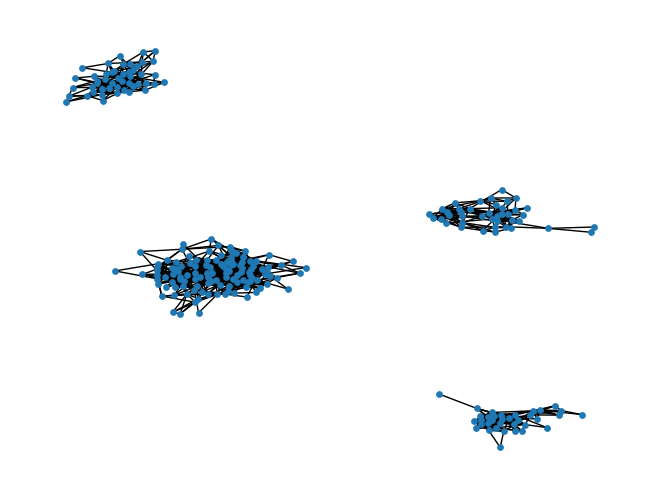

In [64]:
filename = "data/example1.dat"

graph_unsorted = nx.read_edgelist(filename, delimiter=",", nodetype=int, data=(("weight", int)))
graph = nx.Graph()
graph.add_nodes_from(sorted(graph_unsorted.nodes.keys()))
graph.add_edges_from(graph_unsorted.edges)

nx.draw(graph, node_size=15)

### 1) Form the affinity matrix A

In [65]:
size = graph.number_of_nodes()
A = np.zeros([size, size])

for edge in graph.edges:
    node1, node2 = edge
    A[node1 - 1, node2 - 1] = 1
    A[node2 - 1, node1 - 1] = 1
print("A:\n", A)

A:
 [[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 2) Define diagonal matrix D and L

In [66]:
D = np.diag(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = np.dot(np.dot(D_inv, A), D_inv)
print("D:\n", D)
print("L:\n", L)

D:
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 8. 0. ... 0. 0. 0.]
 [0. 0. 9. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 2.]]
L:
 [[0.         0.13363062 0.12598816 ... 0.         0.         0.        ]
 [0.13363062 0.         0.         ... 0.         0.         0.        ]
 [0.12598816 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### 3) Find k largest eigenvectors of L

In [67]:
k = 4
eigenvalues, eigenvectors = np.linalg.eigh(L) 
X = eigenvectors[:, -k:]          
print("X:\n", X)

X:
 [[ 0.          0.0867576   0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.11359237  0.          0.        ]
 [ 0.          0.11823068  0.          0.        ]
 [ 0.          0.08032193  0.          0.        ]
 [ 0.          0.04637389  0.          0.        ]
 [ 0.          0.07332356  0.          0.        ]
 [ 0.          0.12269378  0.          0.        ]
 [ 0.          0.12700013  0.          0.        ]
 [ 0.          0.13116517  0.          0.        ]
 [ 0.          0.13116517  0.          0.        ]
 [ 0.          0.12700013  0.          0.        ]
 [ 0.          0.10369517  0.          0.        ]
 [ 0.          0.16720344  0.          0.        ]
 [ 0.          0.12269378  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.09274778  

### 4) Forming normalized matrix Y using X

In [72]:
Y = np.zeros_like(X)
for i in range(k):
    norm_factor = np.linalg.norm(X[:, i])
    Y[:, i] = X[:, i] / norm_factor if norm_factor != 0 else 0
print("Y:\n", Y)

Y:
 [[ 0.          0.0867576   0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.11359237  0.          0.        ]
 [ 0.          0.11823068  0.          0.        ]
 [ 0.          0.08032193  0.          0.        ]
 [ 0.          0.04637389  0.          0.        ]
 [ 0.          0.07332356  0.          0.        ]
 [ 0.          0.12269378  0.          0.        ]
 [ 0.          0.12700013  0.          0.        ]
 [ 0.          0.13116517  0.          0.        ]
 [ 0.          0.13116517  0.          0.        ]
 [ 0.          0.12700013  0.          0.        ]
 [ 0.          0.10369517  0.          0.        ]
 [ 0.          0.16720344  0.          0.        ]
 [ 0.          0.12269378  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.09837388  0.          0.        ]
 [ 0.          0.09274778  0.          0.        ]
 [ 0.          0.09274778  

### 5) Use k-means clustering

In [69]:
labels = KMeans(n_clusters=k).fit(Y).labels_

/home/emotror/Data_Mining/ID2222-Data-Mining/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plot the results

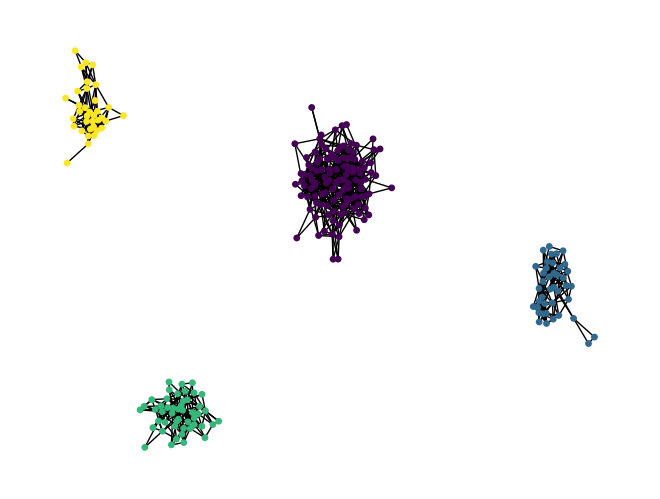

In [70]:
plt.figure()
nx.draw(graph, node_size=15, node_color=labels)
plt.show()